## Anomaly Detection

Energy consumption in buildings and industry is often wasted due to user behaviour, human error, and poorly performing equipment. In this context, identifying abnormal consumption power behavior can be an important part of reducing peak energy consumption and changing undesirable user behavior. With the widespread rollouts of smart meters, normal operating consumption can be learned over time and used to identify or flag abnormal consumption. Such information can help indicate to users when their equipment is not operating as normal and can help to change user behavior or to even indicate what the problem appliances may be to implement lasting changes.

This challenge is looking for data scientists to apply their skills to an anomaly detection problem using smart meter data. Ideally, such an algorithm should begin to operate after as little as 3 months and should improve over time. A platform to visualise the anomalies would also be useful. Users can select any type of machine learning algorithms that they wish to in order to detect the anomalies from the data.

In [2]:
import pandas as pd

df = pd.read_csv('data/energy.csv')
#01.01.16 00:15
df['datetime'] =  pd.to_datetime(df['datetime'], format='%d.%m.%y %H:%M')

In [3]:
df.head()

,datetime,kWh
0,2016-01-01 00:15:00,2.85
1,2016-01-01 00:30:00,2.85
2,2016-01-01 00:45:00,3.00
3,2016-01-01 01:00:00,2.94
4,2016-01-01 01:15:00,2.79


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47581 entries, 0 to 47580
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  47581 non-null  datetime64[ns]
 1   kWh       47581 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 743.6 KB


In [5]:
df['kWh'].describe()

count    47581.000000
mean         4.184218
std          1.821024
min          2.310000
25%          2.670000
50%          3.330000
75%          5.760000
max          9.480000
Name: kWh, dtype: float64

<AxesSubplot:xlabel='datetime'>

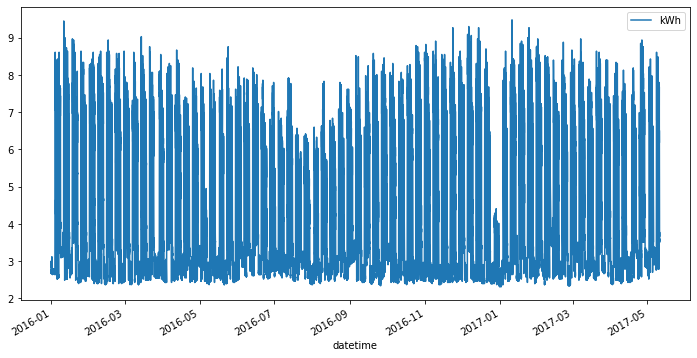

In [7]:
df.plot(x='datetime', y='kWh', figsize=(12,6))

<AxesSubplot:xlabel='datetime'>

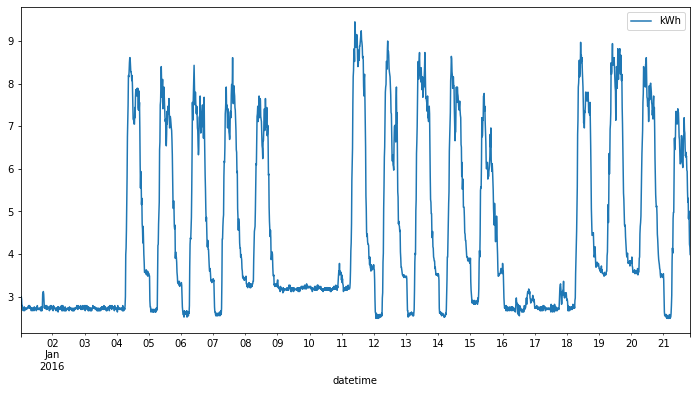

In [8]:
df.iloc[0:2000].plot(x='datetime', y='kWh', figsize=(12,6))

### Isolation Forests For Anomaly Detection

Isolation Forest detects anomalies purely based on the fact that anomalies are data points that are few and different. The anomalies isolation is implemented without employing any distance or density measure. This method is fundamentally different from clustering based or distance based algorithms.

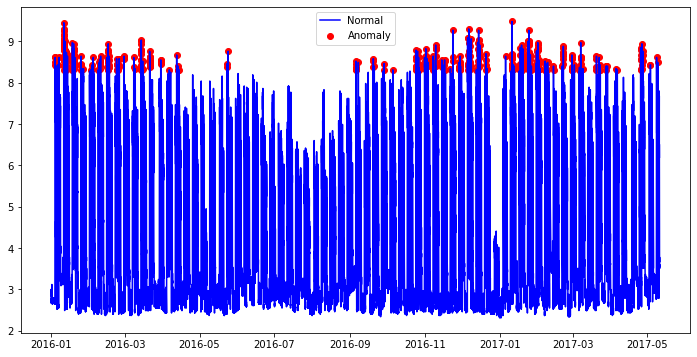

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

data = df[['kWh']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# train isolation forest
outliers_fraction = 0.01
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 
df['anomaly2'] = pd.Series(model.predict(data))

# visualization
fig, ax = plt.subplots(figsize=(12,6))

a = df.loc[df['anomaly2'] == -1, ['datetime', 'kWh']] #anomaly

ax.plot(df['datetime'], df['kWh'], color='blue', label = 'Normal')
ax.scatter(a['datetime'], a['kWh'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

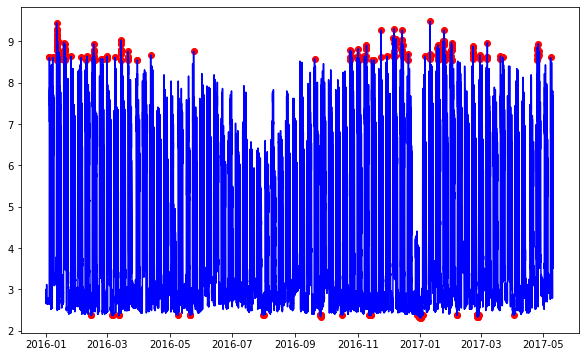

In [10]:
from sklearn.svm import OneClassSVM

data = df[['kWh']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train oneclassSVM 
outliers_fraction = 0.01
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
model.fit(data)
df['anomaly3'] = pd.Series(model.predict(data))

fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly3'] == -1, ['datetime', 'kWh']] #anomaly

ax.plot(df['datetime'], df['kWh'], color='blue')
ax.scatter(a['datetime'], a['kWh'], color='red')
plt.show();

In [11]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go

TODO: Extract the values and apply log transform to stabilize the variance in the data or to make it stationary before feeding it to the model.

In [15]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import numpy as np
import plotly.tools as tls
import pmdarima as pm

In [16]:
actual_vals = df.kWh.values
actual_log = np.log10(actual_vals)

train, test = actual_vals[0:-70], actual_vals[-70:]
train_log, test_log = actual_log[0:-70], actual_log[-70:]

In [17]:
stepwise_model = pm.auto_arima(train_log[:1000], seasonal=True, m=12)

/Users/mariusgiger/Downloads/energy-hackdays-anomaly-detection/anomaly-detection-model/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mariusgiger/Downloads/energy-hackdays-anomaly-detection/anomaly-detection-model/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mariusgiger/Downloads/energy-hackdays-anomaly-detection/anomaly-detection-model/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mariusgiger/Downloads/energy-hackdays-anomaly-detection/anomaly-detection-model/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mariusgiger/Downloads/energy-hackdays-ano

/Users/mariusgiger/Downloads/energy-hackdays-anomaly-detection/anomaly-detection-model/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mariusgiger/Downloads/energy-hackdays-anomaly-detection/anomaly-detection-model/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mariusgiger/Downloads/energy-hackdays-anomaly-detection/anomaly-detection-model/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



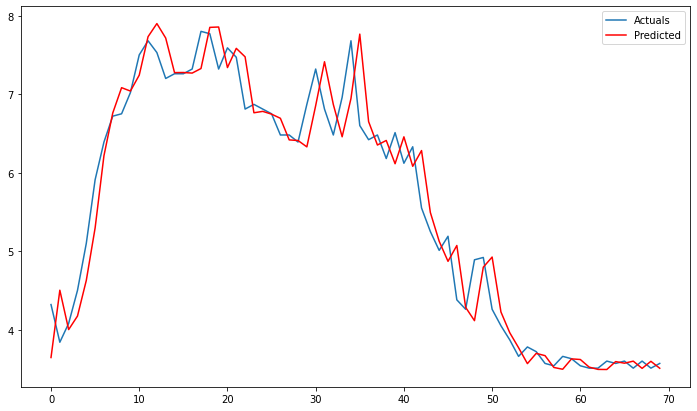

In [31]:
import math
from sklearn.metrics import mean_squared_error

history = [x for x in train_log]
predictions = list()
predict_log=list()
for t in range(len(test_log)):
    stepwise_model.fit(history)
    output = stepwise_model.predict(n_periods=1)
    predict_log.append(output[0])
    yhat = 10**output[0]
    predictions.append(yhat)
    obs = test_log[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (output[0], obs))
    #error = math.sqrt(mean_squared_error(test_log, predict_log))
    #print('Test rmse: %.3f' % error)
    # plot

figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(test,label='Actuals')
pyplot.plot(predictions, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

In [26]:
predicted_df=pd.DataFrame()
predicted_df['datetime']=df['datetime'][-70:]
predicted_df['actuals']=test[0:1000]
predicted_df['predicted']=predictions
predicted_df.reset_index(inplace=True)
del predicted_df['index']
predicted_df.head()

,datetime,actuals,predicted
0,2017-05-10 06:45:00,4.32,2.827721
1,2017-05-10 07:00:00,3.84,4.343246
2,2017-05-10 07:15:00,4.08,4.010713
3,2017-05-10 07:30:00,4.50,4.181042
4,2017-05-10 07:45:00,5.10,4.640550


In [27]:
def detect_classify_anomalies(df,window):
    df.replace([np.inf, -np.inf], np.NaN, inplace=True)
    df.fillna(0,inplace=True)
    df['error']=df['actuals']-df['predicted']
    df['percentage_change'] = ((df['actuals'] - df['predicted']) / df['actuals']) * 100
    df['meanval'] = df['error'].rolling(window=window).mean()
    df['deviation'] = df['error'].rolling(window=window).std()
    df['-3s'] = df['meanval'] - (2 * df['deviation'])
    df['3s'] = df['meanval'] + (2 * df['deviation'])
    df['-2s'] = df['meanval'] - (1.75 * df['deviation'])
    df['2s'] = df['meanval'] + (1.75 * df['deviation'])
    df['-1s'] = df['meanval'] - (1.5 * df['deviation'])
    df['1s'] = df['meanval'] + (1.5 * df['deviation'])
    cut_list = df[['error', '-3s', '-2s', '-1s', 'meanval', '1s', '2s', '3s']]
    cut_values = cut_list.values
    cut_sort = np.sort(cut_values)
    df['impact'] = [(lambda x: np.where(cut_sort == df['error'][x])[1][0])(x) for x in
                               range(len(df['error']))]
    severity = {0: 3, 1: 2, 2: 1, 3: 0, 4: 0, 5: 1, 6: 2, 7: 3}
    region = {0: "NEGATIVE", 1: "NEGATIVE", 2: "NEGATIVE", 3: "NEGATIVE", 4: "POSITIVE", 5: "POSITIVE", 6: "POSITIVE",
              7: "POSITIVE"}
    df['color'] =  df['impact'].map(severity)
    df['region'] = df['impact'].map(region)
    df['anomaly_points'] = np.where(df['color'] == 3, df['error'], np.nan)
    df = df.sort_values(by='datetime', ascending=False)

    return df

In [28]:
def plot_anomaly(df,metric_name):
    #error = pd.DataFrame(Order_results.error.values)
    #df = df.sort_values(by='load_date', ascending=False)
    #df.load_date = pd.to_datetime(df['load_date'].astype(str), format="%Y%m%d")
    dates = df.datetime
    #meanval = error.rolling(window=window).mean()
    #deviation = error.rolling(window=window).std()
    #res = error

    #upper_bond=meanval + (2 * deviation)
    #lower_bond=meanval - (2 * deviation)

    #anomalies = pd.DataFrame(index=res.index, columns=res.columns)
    #anomalies[res < lower_bond] = res[res < lower_bond]
    #anomalies[res > upper_bond] = res[res > upper_bond]
    bool_array = (abs(df['anomaly_points']) > 0)



    #And a subplot of the Actual Values.
    actuals = df["actuals"][-len(bool_array):]
    anomaly_points = bool_array * actuals
    anomaly_points[anomaly_points == 0] = np.nan

    #Order_results['meanval']=meanval
    #Order_results['deviation']=deviation

    color_map= {0: "'rgba(228, 222, 249, 0.65)'", 1: "yellow", 2: "orange", 3: "red"}
    table = go.Table(
    domain=dict(x=[0, 1],
                y=[0, 0.3]),
    columnwidth=[1, 2 ],
    #columnorder=[0, 1, 2,],
    header = dict(height = 20,
                  values = [['<b>Date</b>'],['<b>Actual Values </b>'],
                            ['<b>Predicted</b>'], ['<b>% Difference</b>'],['<b>Severity (0-3)</b>']],
                 font = dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                 fill = dict(color='#d562be')),
    cells = dict(values = [df.round(3)[k].tolist() for k in ['datetime', 'actuals', 'predicted',
                                                               'percentage_change','color']],
                 line = dict(color='#506784'),
                 align = ['center'] * 5,
                 font = dict(color=['rgb(40, 40, 40)'] * 5, size=12),
                 #format = [None] + [",.4f"] + [',.4f'],

                 #suffix=[None] * 4,
                 suffix=[None] + [''] + [''] + ['%'] + [''],
                 height = 27,
                 #fill = dict(color=['rgb(235, 193, 238)', 'rgba(228, 222, 249, 0.65)']))
                 fill=dict(color= ['rgb(245,245,245)'],#unique color for the first column
                      #[df['color'].map(color_map)],
                      )
    ))


    #df['ano'] = np.where(df['color']==3, df['error'], np.nan)

    anomalies = go.Scatter(name="Anomaly",
                       x=dates,
                       xaxis='x1',
                       yaxis='y1',
                       y=df['anomaly_points'],
                       mode='markers',
                       marker = dict(color ='red',
                      size = 11,line = dict(
                                         color = "red",
                                         width = 2)))

    upper_bound = go.Scatter(hoverinfo="skip",
                         x=dates,
                         showlegend =False,
                         xaxis='x1',
                         yaxis='y1',
                         y=df['3s'],
                         marker=dict(color="#444"),
                         line=dict(
                             color=('rgb(23, 96, 167)'),
                             width=2,
                             dash='dash'),
                         fillcolor='rgba(68, 68, 68, 0.3)',
                         fill='tonexty')

    lower_bound = go.Scatter(name='Confidence Interval',
                          x=dates,
                         xaxis='x1',
                         yaxis='y1',
                          y=df['-3s'],
                          marker=dict(color="#444"),
                          line=dict(
                              color=('rgb(23, 96, 167)'),
                              width=2,
                              dash='dash'),
                          fillcolor='rgba(68, 68, 68, 0.3)',
                          fill='tonexty')

    Actuals = go.Scatter(name= 'Actuals',
                     x= dates,
                     y= df['actuals'],
                    xaxis='x2', yaxis='y2',
                     mode='lines',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="blue"))

    Predicted = go.Scatter(name= 'Predicted',
                     x= dates,
                     y= df['predicted'],
                    xaxis='x2', yaxis='y2',
                     mode='lines',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="orange"))



    # create plot for error...
    Error = go.Scatter(name="Error",
                   x=dates, y=df['error'],
                   xaxis='x1',
                   yaxis='y1',
                   mode='lines',
                   marker=dict(size=12,
                               line=dict(width=1),
                               color="red"),
                   text="Error")



    anomalies_map = go.Scatter(name = "anomaly actual",
                                   showlegend=False,
                                   x=dates,
                                   y=anomaly_points,
                                   mode='markers',
                                   xaxis='x2',
                                   yaxis='y2',
                                    marker = dict(color ="red",
                                  size = 11,
                                 line = dict(
                                     color = "red",
                                     width = 2)))

    Mvingavrg = go.Scatter(name="Moving Average",
                           x=dates,
                           y=df['meanval'],
                           mode='lines',
                           xaxis='x1',
                           yaxis='y1',
                           marker=dict(size=12,
                                       line=dict(width=1),
                                       color="green"),
                           text="Moving average")

    axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True,
    ticklen=4,
    gridcolor='#ffffff',
    tickfont=dict(size=10))

    layout = dict(
    width=1000,
    height=865,
    autosize=False,
    title= metric_name,
    margin = dict(t=75),
    showlegend=True,
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1', showticklabels=True)),
    xaxis2=dict(axis, **dict(domain=[0, 1], anchor='y2', showticklabels=True)),
    yaxis1=dict(axis, **dict(domain=[2 * 0.21 + 0.20 + 0.09, 1], anchor='x1', hoverformat='.2f')),
    yaxis2=dict(axis, **dict(domain=[0.21 + 0.12, 2 * 0.31 + 0.02], anchor='x2', hoverformat='.2f')))

    fig = go.Figure(data = [table,anomalies,anomalies_map,
                        upper_bound,lower_bound,Actuals,Predicted,
                        Mvingavrg,Error], layout = layout)

    iplot(fig)
    pyplot.show()


In [29]:
classify_df=detect_classify_anomalies(predicted_df,7)
classify_df.reset_index(inplace=True)
del classify_df['index']
classify_df.head()

,datetime,actuals,predicted,error,percentage_change,meanval,deviation,-3s,3s,-2s,2s,-1s,1s,impact,color,region,anomaly_points
0,2017-05-11 00:00:00,3.57,3.508836,0.061164,1.713276,0.010958,0.079200,-0.147441,0.169358,-0.127641,0.149558,-0.107841,0.129758,4,0,POSITIVE,NaN
1,2017-05-10 23:45:00,3.51,3.600145,-0.090145,-2.568232,0.001271,0.076123,-0.150974,0.153517,-0.131944,0.134486,-0.112913,0.115455,3,0,NEGATIVE,NaN
2,2017-05-10 23:30:00,3.60,3.507266,0.092734,2.575957,0.012474,0.065449,-0.118424,0.143372,-0.102062,0.127010,-0.085700,0.110648,4,0,POSITIVE,NaN
3,2017-05-10 23:15:00,3.51,3.591197,-0.081197,-2.313300,-0.007421,0.057692,-0.122805,0.107964,-0.108382,0.093541,-0.093959,0.079118,3,0,NEGATIVE,NaN
4,2017-05-10 23:00:00,3.60,3.580535,0.019465,0.540695,0.004512,0.047655,-0.090798,0.099822,-0.078884,0.087908,-0.066971,0.075994,4,0,POSITIVE,NaN


In [30]:
plot_anomaly(classify_df.iloc[:-6,:],"meanval")

In [ ]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [ ]:
#### LSTM
supervised = timeseries_to_supervised(actual_log, 1)
supervised_values = supervised.values

# split data into train and test-sets
train_lstm, test_lstm = supervised_values[0:-70], supervised_values[-70:]

# transform the scale of the data
scaler, train_scaled_lstm, test_scaled_lstm = scale(train_lstm, test_lstm)

In [ ]:
# fit the model                 batch,Epoch,Neurons
lstm_model = fit_lstm(train_scaled_lstm, 1, 850 , 3)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled_lstm[:, 0].reshape(len(train_scaled_lstm), 1, 1)
#lstm_model.predict(train_reshaped, batch_size=1)

In [24]:
df["time"] = pd.to_datetime(df['datetime']).dt.strftime('%Y-%m-%dT%H:%M%:%SZ')
df[["time", "kWh"]].to_json(r'./data/energy.json', orient='records')

## Links
    
- https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46
- https://www.kaggle.com/adithya44/anomaly-detection-with-time-series-forecasting